## **Correlação**

É qualquer relação estatística, casual ou não, entre duas variáveis.

Temos a correlação *linear*, que é quando esse relacionamento entre as duas variáveis, quando mostradas em um gráfico, é semelhante a um traço de uma linha. Neste contexto, podemos utilizar o gráfico de dispersão (pontos) para fazermos a análise visual da correlação.



Temos três tipos de correlação:

- **Positiva**: quando uma variável aumenta a outra aumenta também;
- **Negativa**: quando uma variável diminui a outra diminui também;
- **Não-correlação**: quando não há correlação entre as variáveis.

## Covariância

Existem algumas medidas numéricas para mostrar o relacionamento entre duas variáveis. Entre elas estão a covariância e o coeficiente de correlação Pearson.

Na covariância, avaliamos se duas variáveis variam conjuntamente, ou seja, verifica se mudanças em uma variável em relação à média correspondem a mudanças similiares na outra variável.

## Coeficiente de Pearson

Para fazer uma comparação mais clara entre duas variáveis, é interessante realizar a normalização/padronização das escalas antes de avaliar as covariâncias de dois conjuntos de dados.

É através dessa normalização que entra o coeficiente de Pearson, que é obtido a partir da divisão da covariância de duas variáveis pelo produto dos seus desvios padrão (padronização). Vendo de outro modo, o coeficiente de Pearson é uma covariância padronizada.

### Intensidade da correlação

- Fraca: coeficiente de Pearson entre 0 e 4;
- Moderada: coeficiente de Pearson entre 0.4 e 1;
- Forte: coeficiente de Pearson entre 0.7 e 1.

**Correlações são muito sensíveis a outliers*

## Matriz de correlação

Podemos calcular o coeficiente de Pearson com todas as variáveis do conjunto de dados. Assim, é possível verificar quais atributos (variáveis) possuem maior relação com a variável responsta (rótulo/classe). Com isso, o processo de seleção de variáveis que serão utilizadas no modelo é facilitado.

#Prática

In [1]:
# Importando a biblioteca Pandas e NumPy
import pandas as pd
import numpy as np

In [2]:
np.arange(0,11) * 10

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [3]:
# Gerando um DataFrame de consumo de cerveja x preço

df = pd.DataFrame(
    {'quantidade_cerveja': np.arange(0,11),
     'valor_total': np.arange(0,11) * 10
     }
)

In [4]:
df

,quantidade_cerveja,valor_total
0,0,0
1,1,10
2,2,20
3,3,30
4,4,40
5,5,50
6,6,60
7,7,70
8,8,80
9,9,90


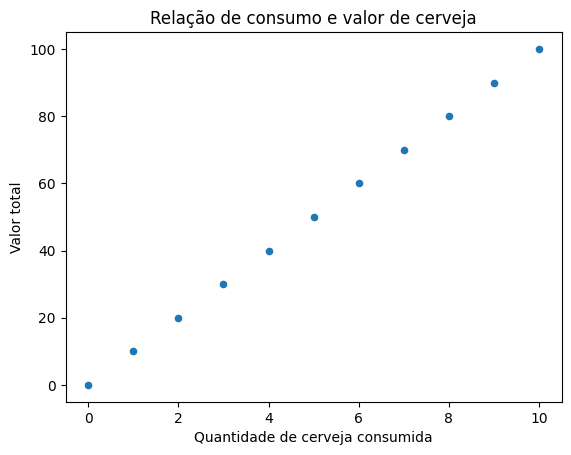

In [5]:
# Criando um gráfico de pontos (dispersão) para visualizar melhor os dados da tabela acima

df.plot(kind='scatter', # tipo do gráfico
        x='quantidade_cerveja', # eixo x
        y='valor_total', # eixo y
        title='Relação de consumo e valor de cerveja', # título do gráfico
        xlabel='Quantidade de cerveja consumida', # rótulo do eixo x
        ylabel='Valor total', # rótulo do eixo y

);

*Podemos ver uma correlação forte e positiva entre as duas variáveis, pois, enquanto uma aumenta, a outra aumenta na mesma proporção*


In [6]:
# Aplicando o método .cov() para verificar a correlação entre as duas variáveis do DataFrame
df.cov()

,quantidade_cerveja,valor_total
quantidade_cerveja,11.0,110.0
valor_total,110.0,1100.0


*É possível verificar que há uma correlação entre as duas variáveis, porém os valores estão em escaldas diferentes e isso dificulta medirmos o quão forte é esta correlação. Para uma melhor compreensão, vamos utilizar o coeficiente de Pearson, que normaliza os dados e os traz na mesma proporção.*

In [7]:
# Aplicando o método .corr()
df.corr()

,quantidade_cerveja,valor_total
quantidade_cerveja,1.0,1.0
valor_total,1.0,1.0


*Agora sim temos uma compreensão melhor da correlação, pois como a correlação de Pearson varia de -1 a 1, vemos que as duas variáveis tem uma correlação muito forte entre elas (valor 1)*

In [8]:
# Importando a biblioteca Seaborn para gerar um gráfico de matriz de correlação, heatmap (mapa de calor)
import seaborn as sns

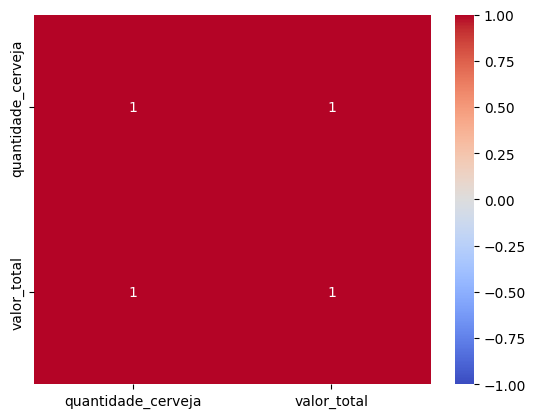

In [10]:
sns.heatmap(df.corr(), #base de dados
            vmin=-1, # definindo o menor valor da escala
            vmax=1, # definindo o maior valor da escala
            annot=True, # ativando o rótulo dos dados
            cmap='coolwarm' # definindo uma paleta de cores

);

In [11]:
# Adicionando uma variável aleatória no DataFrame para vermos as correlações

np.random.seed(0) # definindo uma semente para sempre gerar os mesmo números

df = pd.DataFrame(
    {'aleatoria': np.random.randint(0,100,11),
     'quantidade_cerveja': np.arange(0,11),
     'valor_total': np.arange(0,11) * 10
     }
)

In [12]:
df

,aleatoria,quantidade_cerveja,valor_total
0,44,0,0
1,47,1,10
2,64,2,20
3,67,3,30
4,67,4,40
5,9,5,50
6,83,6,60
7,21,7,70
8,36,8,80
9,87,9,90


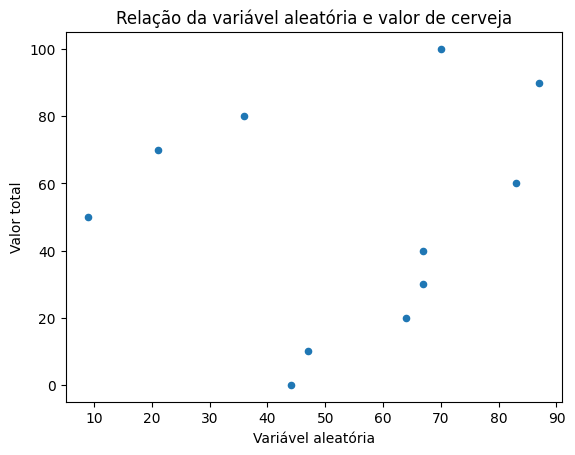

In [22]:
# Criando um gráfico de pontos (dispersão) com a nova variável aleatória

df.plot(kind='scatter', # tipo do gráfico
        x='aleatoria', # eixo x
        y='valor_total', # eixo y
        title='Relação da variável aleatória e valor de cerveja', # título do gráfico
        xlabel='Variável aleatória', # rótulo do eixo x
        ylabel='Valor total', # rótulo do eixo y

);

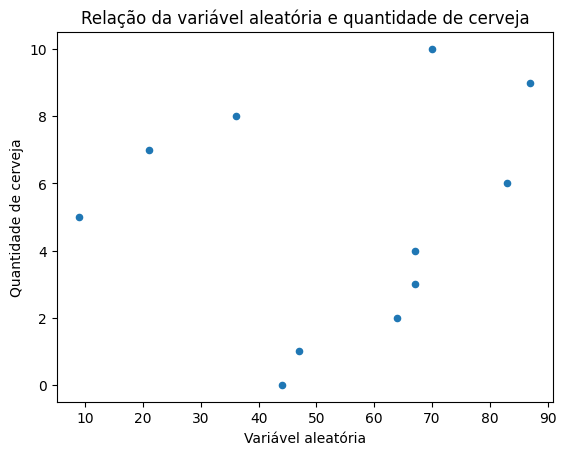

In [21]:
df.plot(kind='scatter', # tipo do gráfico
        x='aleatoria', # eixo x
        y='quantidade_cerveja', # eixo y
        title='Relação da variável aleatória e quantidade de cerveja', # título do gráfico
        xlabel='Variável aleatória', # rótulo do eixo x
        ylabel='Quantidade de cerveja', # rótulo do eixo y

);

In [17]:
# Adicionando uma variável com correlação negativa no DataFrame para vermos as correlações

np.random.seed(0) # definindo uma semente para sempre gerar os mesmo números

df = pd.DataFrame(
    {'forte_negativa': np.arange(0,11)[::-1],
     'aleatoria': np.random.randint(0,100,11),
     'quantidade_cerveja': np.arange(0,11),
     'valor_total': np.arange(0,11) * 10
     }
)

In [18]:
df

,forte_negativa,aleatoria,quantidade_cerveja,valor_total
0,10,44,0,0
1,9,47,1,10
2,8,64,2,20
3,7,67,3,30
4,6,67,4,40
5,5,9,5,50
6,4,83,6,60
7,3,21,7,70
8,2,36,8,80
9,1,87,9,90


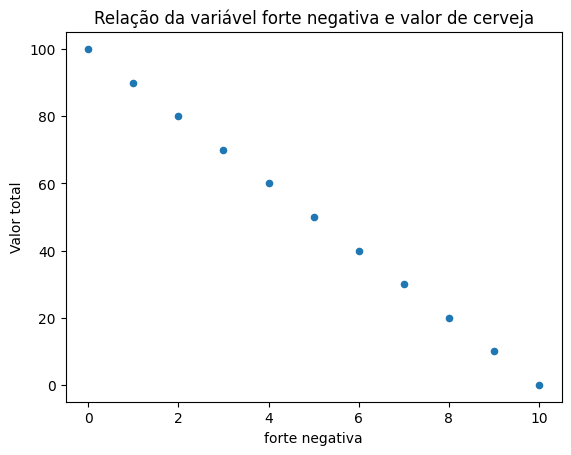

In [20]:
# Criando um gráfico de pontos (dispersão) com a nova variável forte negativa

df.plot(kind='scatter', # tipo do gráfico
        x='forte_negativa', # eixo x
        y='valor_total', # eixo y
        title='Relação da variável forte negativa e valor de cerveja', # título do gráfico
        xlabel='forte negativa', # rótulo do eixo x
        ylabel='Valor total', # rótulo do eixo y

);

In [23]:
# Gerando outra matriz de correlação para compararmos as novas variáveis
df.corr()

,forte_negativa,aleatoria,quantidade_cerveja,valor_total
forte_negativa,1.000000,-0.157279,-1.000000,-1.000000
aleatoria,-0.157279,1.000000,0.157279,0.157279
quantidade_cerveja,-1.000000,0.157279,1.000000,1.000000
valor_total,-1.000000,0.157279,1.000000,1.000000


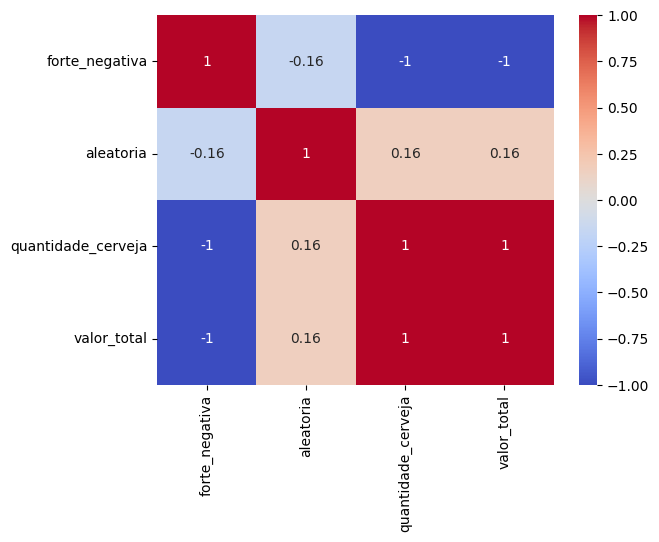

In [24]:
# Plotando a matriz acima para um gráfico de calor (heatmap)

sns.heatmap(df.corr(), #base de dados
            vmin=-1, # definindo o menor valor da escala
            vmax=1, # definindo o maior valor da escala
            annot=True, # ativando o rótulo dos dados
            cmap='coolwarm' # definindo uma paleta de cores

);